In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def neighbours(A, i, j):
    # calculate number of neighbours of A[i,j] that are infected
    nbrs = 0
    rows, cols = A.shape
    
    # sum across row i - 1
    if i > 0:
        if j > 0: nbrs += (A[i-1, j-1] == 1)
        nbrs += (A[i-1, j] == 1)
        if j < cols - 1: nbrs += (A[i-1, j+1] == 1)
    
    # sum across row i
    if j > 0: nbrs += (A[i, j-1] == 1)
    nbrs += (A[i, j] == 1)
    if j < cols - 1: nbrs += (A[i, j+1] == 1)
    
    # sum across row i + 1
    if i < rows - 1:
        if j > 0: nbrs += (A[i+1, j-1] == 1)
        nbrs += (A[i+1, j] == 1)
        if j < cols - 1: nbrs += (A[i+1, j+1] == 1)
    
    return nbrs

In [28]:
def forest_fire_plot(X):
    # plot infected and removed individuals
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if X[i, j] == 1:
                plt.scatter(i, j, color='red')
            elif X[i, j] == 0:
                plt.scatter(i, j, color='grey')
            elif X[i, j] == 2:
                plt.scatter(i, j, color='green')  # Susceptible trees


In [29]:
def forest_fire(X, a, b, pausing=False):
    # simulate forest fire epidemic model
    # X[i, j] = 2 for susceptible; 1 for infected; 0 for removed
    plt.figure()
    plt.xlim(0, X.shape[0])
    plt.ylim(0, X.shape[1])
    forest_fire_plot(X)
    plt.show()

    framecounter = 0
    # main loop
    burning = True
    while burning:
        burning = False

        # check if pausing between updates
        if pausing:
            input("Hit any key to continue")

        # update
        B = X.copy()
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                if X[i, j] == 2:
                    if np.random.rand() > (1 - a)**neighbours(X, i, j):
                        B[i, j] = 1
                elif X[i, j] == 1:
                    burning = True
                    if np.random.rand() < b:
                        B[i, j] = 0
        
        X = B
        plt.figure()
        plt.xlim(0, X.shape[0])
        plt.ylim(0, X.shape[1])
        forest_fire_plot(X)
        plt.savefig("./simulation_frames/forest_fire_frame"+ str(framecounter) +".png")
        framecounter = framecounter + 1
        plt.close()
        #plt.show()
    
    return X

In [30]:
# spark
np.random.seed(3)
X = np.full((21, 21), 2)
X[10, 10] = 1


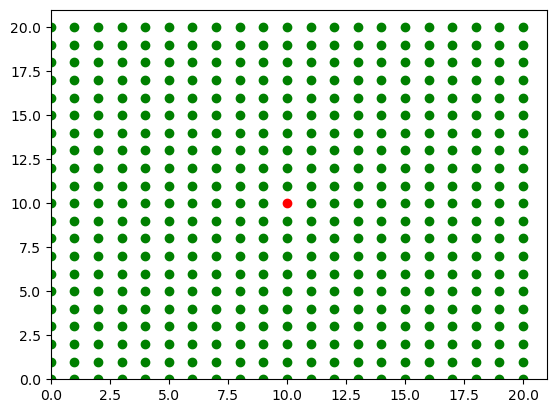

In [32]:
# big fires
X = forest_fire(X, 0.5, 0.4, False)
# medium fires
# X = forest_fire(X, 0.07, 0.2, True)
# X = forest_fire(X, 0.1, 0.4, True)
# small fires
# X = forest_fire(X, 0.05, 0.2, True)
# X = forest_fire(X, 0.07, 0.4, True)